Implemented in Google Colab

@Yilan Xiao

#Implementation

##Loading Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from os import system, name
from time import sleep
from numpy import *

##Perceptron Class

In [ ]:
class Perceptron(object):

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    def __init__(self, no_inputs, no_of_different_labels=10,max_iterations=20, learning_rate=0.1, bias=0, train_size=60000, test_size = 10000):
        self.no_inputs = no_inputs #28by28 -> 784*1
        self.weights = np.ones(no_inputs) / no_inputs #784*1
        self.no_of_different_labels = no_of_different_labels
        self.multi_weights = np.ones((no_of_different_labels,no_inputs))/no_inputs #10*784
        self.bias = bias
        self.multi_bias = np.zeros((no_of_different_labels,1)) #10*1
        self.weight_update = np.zeros(no_inputs) / no_inputs
        self.bias_update = 0
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.train_size = train_size
        self.test_size = test_size

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Train size:\t" + str(self.train_size))
        print("Test size:\t" + str(self.test_size))
        print("Max iterations:\t" + str(self.max_iterations))
        print("Learning rate:\t" + str(self.learning_rate))
        print("Weights:\t" + str(self.weights))
        print("Bias:\t" + str(self.bias))       

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details_multiclass(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Train size:\t" + str(self.train_size))
        print("Test size:\t" + str(self.test_size))
        print("Max iterations:\t" + str(self.max_iterations))
        print("Learning rate:\t" + str(self.learning_rate))
        print("Multi_Weights:\t" + str(self.multi_weights))
        print("Multi_Bias:\t" + str(self.multi_bias))   

    #=========================================#
    # Performs feed-forward binary prediction #
    # on one set of inputs.                   #
    #=========================================#
    def predict(self, inputs):   
    #weighted sum of inputs
    #add bias to weighted sum of inputs
    #->activation of the node         
        activation = np.dot(inputs,self.weights) + self.bias#add bias ->bias*c if need to change the constant       
    #apply activation function to the activation of the node    
    #Step function as activation function
        if activation > 0:
            output = 1
        else:
            output = 0      
        return output

    #==============================================#
    # Performs feed-forward multi-class prediction #
    # on one set of inputs.                        #
    #==============================================#
    def predict_multiclass(self, inputs):#def predict
    # for every node position
    # calculate the weighted sum of the position dops(nput,weight)+bias
    # activation functions activation = weighted_sum
        a = np.zeros(no_of_different_labels)#10*1
        for i in range(self.no_of_different_labels):#each node
          a[i] = np.dot(inputs, self.multi_weights[i]) + self.multi_bias[i]
    #find the maximum in number node in predicted nodes activations
        a = np.asarray(a)
        max = np.amax(a)
    #finalise the node as the output
        node = np.asarray([int (x==max) for x in a])
        return node

    #=============================================#
    # Performs feed-forward multi-class           #
    # prediction with sigmoid activation function #
    # on one set of inputs.                       #
    #=============================================#
    def predict_multiclass_sigmoid(self, inputs):
        a = np.zeros(no_of_different_labels)#10*1
        for i in range(self.no_of_different_labels):#each node
          a[i] = np.dot(inputs, self.multi_weights[i]) + self.multi_bias[i]
        a = np.asarray(a)  
    #sigmoid activation function: sigmoid(a) = 1/(1+exp(-a))
        a = 1/(1+np.exp(-a))
    #find the maximum in number node in predicted nodes activations
        max = np.amax(a)
    #finalise the node as the output
        node = np.asarray([int (x==max) for x in a])
        return node

    #======================================#
    # Trains the binary perceptron using   # 
    # labelled training data.              #
    #======================================#
    def train(self, training_data, labels):
        assert len(training_data) == len(labels)
    #read in from file
    #->input imsize*imsize/28*28
        for i in range(self.train_size):
            data = training_data[i] #784*1
            #print(data.shape)
            label = labels[i] #1
            prediction = self.predict(data)#1
            self.weights = self.weights + self.learning_rate * (label - prediction) * data #784*1     
            self.bias = self.bias + self.learning_rate * (label - prediction) #784*1 #bias*c
        return

    #==================================================#
    # Trains the binary perceptron with batch learning #
    # using labelled training data.                    #
    #==================================================#
    def train_batch(self, training_data, labels):
        assert len(training_data) == len(labels)

        for i in range(self.max_iterations):
          weight_update = self.weight_update
          bias_update = self.bias_update         
          for d in range(self.train_size):  
            data = training_data[d] #784*1
            label = labels[i] #1
            prediction = self.predict(data)#1
            weight_update = weight_update + self.learning_rate * (label - prediction) * data #784*1
            bias_update = bias_update + self.learning_rate * (label - prediction)     
            #self.bias = self.bias + self.learning_rate * (label - prediction) #784*1 #bias*c          
          self.weights += weight_update/self.train_size
          self.bias += bias_update/self.train_size

    #======================================#
    # Trains the multi-class perceptron    #
    # using labelled training data.        #
    #======================================#
    def train_multi_class(self, training_data, labels):
        assert len(training_data) == len(labels)
        for i in range(self.train_size):
            data = training_data[i] #784*1 #print(data.shape)  
            data = reshape(data,(1,784))         
            label = labels[i] #one hot encoded label
            label = reshape(label,(10,1))
            prediction = self.predict_multiclass(data)#1
            prediction = reshape(prediction,(10,1))

            #j = np.argmax(label) #getting the digit where it should be 1 #digit = np.where(r==1)
            #k = np.argmax(prediction)
            error = label - prediction 
            #print(data.shape)
            #print(error.shape)
            self.multi_weights = self.multi_weights +  self.learning_rate * np.dot((label - prediction),data)
            #                       10 * 784                                 10 * 1                   1 * 784
            #if result too bad, try taking out the k lines
            #self.multi_weights[k] = self.multi_weights[k] +  self.learning_rate * (label[k] - prediction[k]) *data

            self.multi_bias = self.multi_bias +  self.learning_rate * error
            #                                         10 * 1
            #self.multi_bias[k] = self.multi_bias[k] +  self.learning_rate * (label[k] - prediction[k])

    #======================================#
    # Trains the multi-class perceptron    #
    # with sigmoid activation using        # 
    # labelled training data.              #
    #======================================#
    def train_multi_class_sigmoid(self, training_data, labels):
        assert len(training_data) == len(labels)
        for i in range(self.train_size):
            data = training_data[i] #784*1 #print(data.shape)
            data = reshape(data,(1,784))              
            label = labels[i] #one hot encoded label
            label = reshape(label,(10,1))
            prediction = self.predict_multiclass_sigmoid(data)#1
            prediction = reshape(prediction,(10,1))

            #j = np.argmax(label) #getting the digit where it should be 1 #digit = np.where(r==1)
            #k = np.argmax(prediction)
            error = label - prediction

            self.multi_weights = self.multi_weights +  self.learning_rate * np.dot(error, data)
            #if result too bad, try taking out the k lines
            #self.multi_weights[k] = self.multi_weights[k] +  self.learning_rate * (label[k] - prediction[k]) *data

            self.multi_bias = self.multi_bias +  self.learning_rate * error
            #self.multi_bias[k] = self.multi_bias[k] +  self.learning_rate * (label[k] - prediction[k])
      
    #=========================================#
    # Tests the binary-classification         # 
    # prediction on each element of           #
    # the testing data. Prints the precision, #
    # recall, and accuracy of the perceptron. #
    #=========================================#
    def test(self, testing_data, labels):
        assert len(testing_data) == len(labels)
        TP = 0 #True Positive, when prediction is true and label is true
        TN = 0 #True Negative, when prediction is false and label is false
        FP = 0 #False Positive, when prediction is ? and label is 
        FN = 0 #False Negative, when prediction is ? and label is ?
        accuracy = 0.0
        precision = 0.0
        recall = 0.0    
        for i in range (self.test_size):
          data = testing_data[i]
          label = labels[i]
          prediction = self.predict(data)
          if (prediction == 1 and label == 1):
            TP = TP + 1
          elif (prediction == 0 and label == 0):
            TN = TN + 1
          elif (prediction == 1 and label == 0):
            FP = FP + 1
          elif (prediction == 0 and label == 1):
            FN = FN + 1

        #assert (TP+TN+FP+FN) == self.test_size
        sum = TP+TN+FP+FN
        accuracy = (TP+TN)/self.test_size
        if (TP + FP) > 0 :
          precision = TP/(TP+FP)
        else:
          print("TP + FP = 0")

        if (TP + FN) > 0:
          recall = TP/(TP+FN)
        else:
          print("TP + FN = 0")

        print("TP+TN+FP+FN:\t"+ str(sum))
        print("TP:\t"+ str(TP))
        print("TN:\t"+ str(TN))
        print("FP:\t"+ str(FP))
        print("FN:\t"+ str(FN))
        print("Accuracy:\t"+str(accuracy))
        print("Precision:\t"+str(precision))
        print("Recall:\t"+str(recall))

    #=========================================#
    # Tests the prediction on each element of #
    # the testing data. Prints the precision, #
    # recall, and accuracy.                   #
    #=========================================#
    def compute_confusion_matrix(self, true, pred):
    #'''Computes a confusion matrix using numpy for two np.arrays
    #true and pred.
    #
    #Results are identical (and similar in computation time) to: 
    #  "from sklearn.metrics import confusion_matrix"
    #
    #However, this function avoids the dependency on sklearn.'''
        K = len(true)
        result = np.zeros((K, K))
        for i in range(K):
          result[int(true[i])][int(pred[i])] += 1
        return result

    def evalutation(self, confusion_matrix):
        
        TP = np.zeros(10)
        FP = np.zeros(10)
        TN = np.zeros(10)
        FN = np.zeros(10)
        for k in range(no_of_different_labels):#different labels
          for i in range(no_of_different_labels): #rows #label
            for j in range(no_of_different_labels): #columns #prediction
              if (k == i and i == j):
                TP[k] += confusion_matrix[i][j]
              if (k != i and k != j):
                TN[k] += confusion_matrix[i][j]
              if (k != i and k == j):    
                FP[k] += confusion_matrix[i][j]
              if (k == i and k != j):
                FN[k] += confusion_matrix[i][j]
        print("TP:", TP)
        print("FP:", FP)
        print("TN:", TN)
        print("FN:", FN)
        print("TP+FP+TN+FN",TP+FP+TN+FN)
        
        TP = np.ma.array(TP, mask=np.isnan(TP))
        FP = np.ma.array(FP, mask=np.isnan(FP))
        TN = np.ma.array(TN, mask=np.isnan(TN))
        FN = np.ma.array(FN, mask=np.isnan(FN))

        accuracy = 1/10 * np.sum((TP+TN)/(TP+FP+TN+FN))
        precision = 1/10 * np.sum(TP/(TP+FP))
        recall = 1/10 * np.sum(TP/(TP+FN))
        f1 = 2 * precision * recall / (precision + recall)

        print("accuracy:", accuracy)
        print("precision:", precision)
        print("recall:", recall)
        print("F1 score:", f1)


    #=========================================#
    # Tests the multi-class prediction on     #
    # each element of the testing data.       # 
    # Prints the label,predicted value and    #
    # accuracy of the perceptron.             #                
    #=========================================#
    def test_multi_class(self, testing_data, labels):
        assert len(testing_data) == len(labels)
        predict = np.zeros(self.test_size)
        actual = np.zeros(self.test_size)

        for i in range(self.test_size):
          data = testing_data[i] #784*1 #print(data.shape)           
          label = labels[i] #one hot encoded label
          prediction = self.predict_multiclass(data)#1

          prediction = np.asarray(prediction)
          max = np.amax(prediction)
          prediction = np.asarray([int (x==max) for x in prediction])

          predict[i] = int(np.argmax(prediction))#predicted digit/label
          actual[i] = int(np.argmax(label))#actual digit/label

        confusion_matrix = self.compute_confusion_matrix(actual,predict)
        return self.evalutation(confusion_matrix)

    #=========================================#
    # Tests the multi-class prediction on     #
    # each element of the testing data.       # 
    # Prints the label,predicted value and    #
    # accuracy of the perceptron.             #                
    #=========================================#
    def test_multi_class_sigmoid(self, testing_data, labels):
        assert len(testing_data) == len(labels)
        predict = np.zeros(self.test_size)
        actual = np.zeros(self.test_size)
        for i in range(self.test_size):
          data = testing_data[i] #784*1 #print(data.shape)           
          label = labels[i] #one hot encoded label
          prediction = self.predict_multiclass_sigmoid(data)#1

          prediction = np.asarray(prediction)
          max = np.amax(prediction)
          prediction = np.asarray([int (x==max) for x in prediction])

          predict[i] = int(np.argmax(prediction))#predicted digit/label
          actual[i] = int(np.argmax(label))#actual digit/label

        confusion_matrix = self.compute_confusion_matrix(actual,predict)
        return self.evalutation(confusion_matrix)


## Loading data and initialisation

In [ ]:
image_size = 28
no_of_different_labels = 10
image_pixels = image_size * image_size
data_path = "/content/drive/MyDrive/Colab Notebooks/DLNNAssignment2/"
train_data_10 = np.loadtxt(data_path + "mnist_train_10.csv", delimiter = ",")
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter = ",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter = ",")

fac = 0.99 / 255
train_imgs_10 = np.asfarray(train_data_10[:, 1:]) * fac + 0.01
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels_10 = np.asfarray(train_data_10[:, :1])
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

## Binary Labels

In [ ]:
train_labels_binary = np.asfarray([int (x == 7) for x in train_labels])
test_labels_binary = np.asfarray([int (x == 7) for x in test_labels])

##Multi-Class Labels

In [ ]:
#one hot encoding labels
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

#Answer Questions

##Q1.1 Binary Perceptron

In [ ]:
p1 = Perceptron(image_size * image_size)
p1.print_details()

p1.train(train_imgs,train_labels_binary)
p1.print_details()

p1.test(test_imgs,test_labels_binary)

No. inputs:	784
Train size:	60000
Test size:	10000
Max iterations:	20
Learning rate:	0.1
Weights:	[0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.001275

TP+TN+FP+FN:	10000 \
TP:	903\
TN:	8926\
FP:	46\
FN:	125\
Accuracy:	0.9829\
Precision:	0.9515279241306639\
Recall:	0.8784046692607004

##Q1.2 Binary Perceptron with Batch Training

In [ ]:
p2 = Perceptron(image_size * image_size)
p2.print_details()

p2.train_batch(train_imgs,train_labels_binary)
p2.print_details()

p2.test(test_imgs,test_labels_binary)

No. inputs:	784
Train size:	60000
Test size:	10000
Max iterations:	20
Learning rate:	0.1
Weights:	[0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551 0.00127551
 0.00127551 0.00127551 0.001275

TP + FP = 0\
TP+TN+FP+FN:	10000\
TP:	0\
TN:	8972\
FP:	0\
FN:	1028\
Accuracy:	0.8972\
Precision:	0.0\
Recall:	0.0

##Q1.3 Multi-Class Perceptron

In [ ]:
p3 = Perceptron(image_size * image_size)
p3.print_details_multiclass()

p3.train_multi_class(train_imgs,train_labels_one_hot)
p3.print_details_multiclass()

p3.test_multi_class(test_imgs,test_labels_one_hot)

No. inputs:	784
Train size:	60000
Test size:	10000
Max iterations:	20
Learning rate:	0.1
Multi_Weights:	[[0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 ...
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]]
Multi_Bias:	[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
No. inputs:	784
Train size:	60000
Test size:	10000
Max iterations:	20
Learning rate:	0.1
Multi_Weights:	[[0.46781551 0.46781551 0.46781551 ... 0.46781551 0.46781551 0.46781551]
 [0.50343551 0.50343551 0.50343551 ... 0.50343551 0.50343551 0.50343551]
 [0.49111551 0.49111551 0.49111551 ... 0.49111551 0.49111551 0.49111551]
 ...
 [0.50697551 0.50697551 0.50697551 ... 0.50697551 0

TP: [ 949. 1097.  844.  894.  869.  472.  929.  842.  741.  889.]\
FP: [ 64.  71. 114. 262. 211.  41. 218.  75. 245. 173.]\
TN: [8956. 8794. 8854. 8728. 8807. 9067. 8824. 8897. 8781. 8818.]\
FN: [ 31.  38. 188. 116. 113. 420.  29. 186. 233. 120.]\
TP+FP+TN+FN [10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]\
accuracy: 0.97052\
precision: 0.8571871383489367\
recall: 0.8482587245196772\
F1 score: 0.8526995602516614

##Q1.4 Multi-Class Perceptron with Sigmoid Activation Function

In [ ]:
p4 = Perceptron(image_size * image_size)
p4.print_details_multiclass()

p4.train_multi_class_sigmoid(train_imgs,train_labels_one_hot)
p4.print_details_multiclass()

p4.test_multi_class_sigmoid(test_imgs,test_labels_one_hot)

No. inputs:	784
Train size:	60000
Test size:	10000
Max iterations:	20
Learning rate:	0.1
Multi_Weights:	[[0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 ...
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]
 [0.00127551 0.00127551 0.00127551 ... 0.00127551 0.00127551 0.00127551]]
Multi_Bias:	[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
No. inputs:	784
Train size:	60000
Test size:	10000
Max iterations:	20
Learning rate:	0.1
Multi_Weights:	[[0.13881551 0.13881551 0.13881551 ... 0.13881551 0.13881551 0.13881551]
 [0.16843551 0.16843551 0.16843551 ... 0.16843551 0.16843551 0.16843551]
 [0.14611551 0.14611551 0.14611551 ... 0.14611551 0.14611551 0.14611551]
 ...
 [0.15997551 0.15997551 0.15997551 ... 0.15997551 0

TP: [759. 767. 679. 940. 581. 558. 843. 738. 578. 728.]\
FP: [  28.   36.  129. 1129.   34.  182.  391.   72.  440.  388.]\
TN: [8992. 8829. 8839. 7861. 8984. 8926. 8651. 8900. 8586. 8603.]\
FN: [221. 368. 353.  70. 401. 334. 115. 290. 396. 281.]\
TP+FP+TN+FN [10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]\
accuracy: 0.9434199999999999\
precision: 0.7727396839072755\
recall: 0.7168902438551217\
F1 score: 0.7437680058763926

##Q1.5 Visualisation

###Images

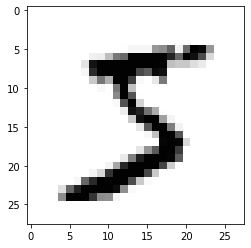

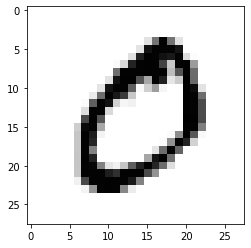

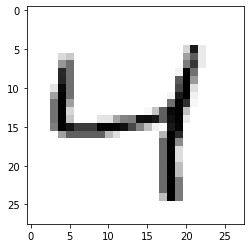

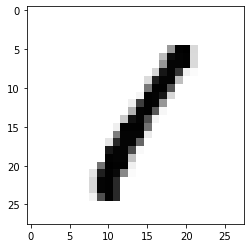

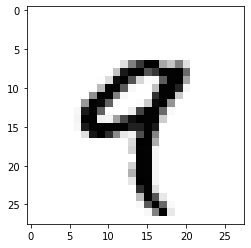

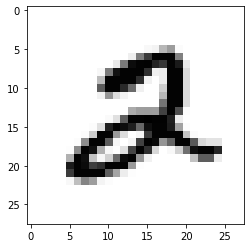

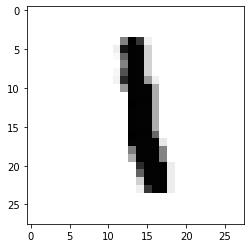

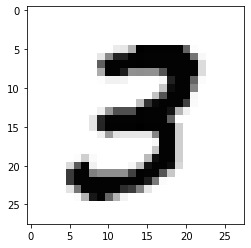

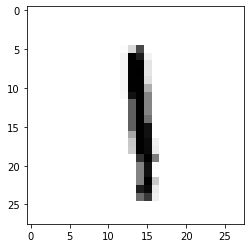

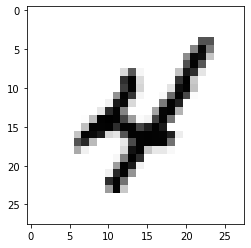

In [ ]:
#Displays images
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap = "Greys")
    plt.show()

###Weights After training

####Q1.1 Binary Perceptron

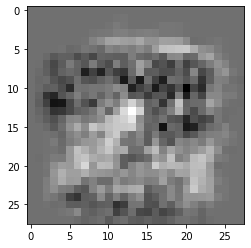

In [ ]:
w1 = p1.weights.reshape((28,28))
plt.imshow(w1, cmap = "Greys")
plt.show()

####Q1.2 Binary Perceptron with Batch Learning

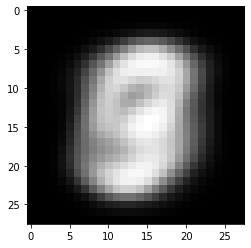

In [ ]:
w2 = p2.weights.reshape((28,28))
plt.imshow(w2, cmap = "Greys")
plt.show()

####Q1.3 Multi-Class Perceptron 

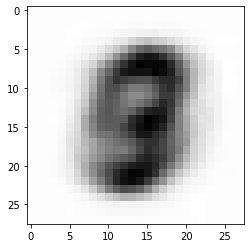

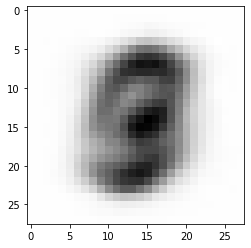

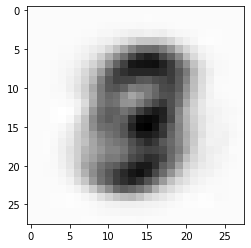

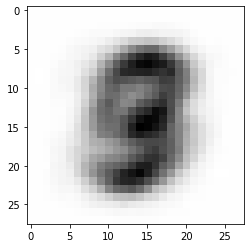

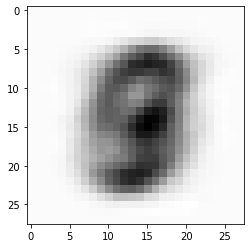

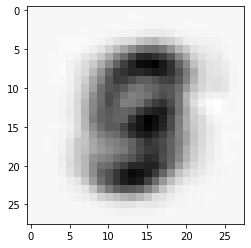

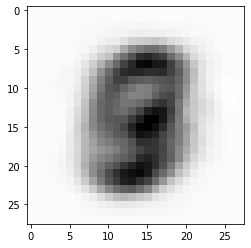

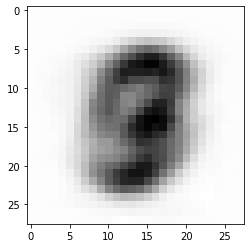

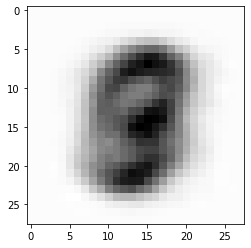

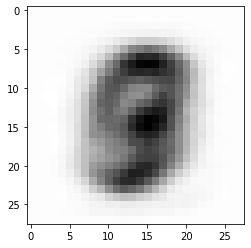

In [ ]:
#multi-class
#trained weights for each digit
for j in range(10):
    w3 = p3.multi_weights[j].reshape((28,28))
    plt.imshow(w3, cmap = "Greys")
    plt.show()

####Q1.4 Multi-Class Perceptron with Sigmoid Activation Function

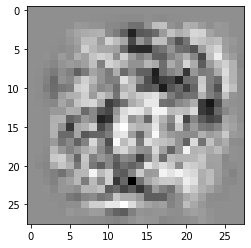

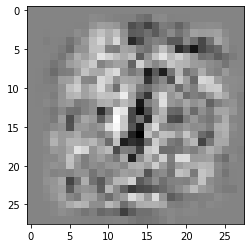

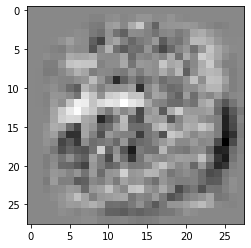

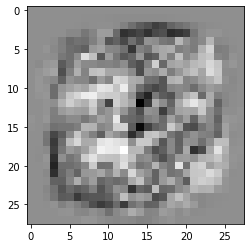

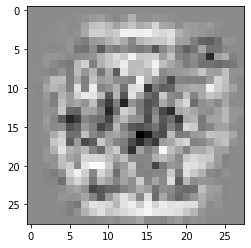

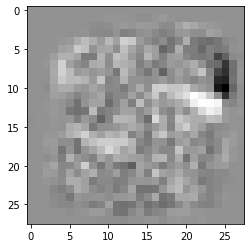

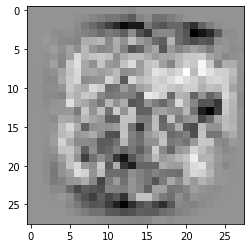

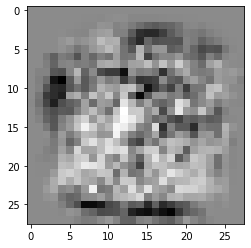

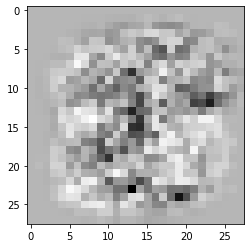

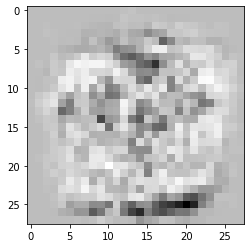

In [ ]:
#multi-class with sigmoid
#trained weights for each digit
for j in range(10):
    w4 = p4.multi_weights[j].reshape((28,28))
    plt.imshow(w4, cmap = "Greys")
    plt.show()